# Pregunta SMART

¿Cuáles son los factores clave asociados a la permanencia de los empleados en la organización, y cómo pueden utilizarse estos datos para predecir la probabilidad de que un empleado permanezca durante el próximo año?

In [ ]:
# Basado en un dataset de Kaggle acerca recursos humanos https://www.kaggle.com/datasets/saadharoon27/hr-analytics-dataset
# la idea es centrarme en la permanencia
# Importar las librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import math


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression #modelamiento
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

pd.set_option('display.float_format', '{:,.2f}'.format)
np.seterr(divide = 'ignore')

# Estilos

rcParams['figure.figsize'] = (12,  6)

In [ ]:
# Leer el conjunto de datos por medio de ruta de Drive y asignarlo a la variable "df"
dataset = "/content/drive/MyDrive/Datasets/HR_Analytics.csv"
df = pd.read_csv(dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descripción de campos

**EmpID:** ID del empleado

**Age:** Edad del empleado

**AgeGroup:** Grupo de edad al que pertenece el empleado

**Attrition:** Estado de abandono del empleado (si el empleado ha dejado la organización o sigue activo)

**BusinessTravel:** Frecuencia de los viajes de negocios del empleado

**DailyRate:** Tarifa diaria de pago del empleado

**Department:** Departamento en el que trabaja el empleado

**DistanceFromHome:** Distancia en millas desde el hogar del empleado hasta el lugar de trabajo

**Education:** Nivel de educación alcanzado por el empleado

**EducationField:** Campo de educación del empleado

**EmployeeCount:** Número de empleados

**EmployeeNumber:** Identificador único para cada empleado

**EnvironmentSatisfaction:** Nivel de satisfacción del empleado con el entorno de trabajo

**Gender:** Género del empleado

**HourlyRate:** Tarifa de pago por hora del empleado

**JobInvolvement:** Nivel de participación laboral del empleado

**JobLevel:** Nivel del puesto de trabajo del empleado

**JobRole:** Rol del empleado dentro de la organización organización

**JobSatisfaction:** nivel de satisfacción del empleado con su trabajo

**MaritalStatus:** estado civil del empleado

**MonthlyIncome:** ingreso mensual del empleado

**SalarySlab:** categorización del ingreso mensual en franjas salariales

**MonthlyRate:** tasa de pago mensual del empleado

**NumCompaniesWorked:** número de empresas para las que ha trabajado el empleado en el pasado

**Over18:** si el empleado tiene más de 18 años

**OverTime:** si el empleado trabaja horas extra o no

**PercentSalaryHike:** porcentaje de aumento del salario del empleado

**PerformanceRating:** calificación del desempeño del empleado

**RelationshipSatisfaction:** nivel de satisfacción del empleado con las relaciones laborales

**StandardHours:** horario laboral estándar del empleado

**StockOptionLevel:** nivel de opciones sobre acciones otorgadas al empleado

**TotalWorkingYears:** número total de años que ha trabajado el empleado

**TrainingTimesLastYear:** número de sesiones de capacitación a las que asistió el empleado en los últimos año

**WorkLifeBalance:** nivel de satisfacción del empleado con el equilibrio entre el trabajo y la vida personal

**YearsAtCompany** número de años que el empleado ha trabajado en la empresa actual

**YearsInCurrentRole:** número de años que el empleado ha estado en el puesto actual

**YearsSinceLastPromotion:** número de años desde la última promoción del empleado

**YearsWithCurrManager:** número de años que el empleado ha estado trabajando con el gerente actual

# Exploración inicial de los datos

In [ ]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.00
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.00
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.00
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.00
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.00


In [ ]:
df.shape

(1480, 38)

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00",...,"1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,480.00","1,423.00"
mean,36.92,801.38,9.22,2.91,1.00,"1,031.86",2.72,65.85,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.18,4.12
std,9.13,403.13,8.13,1.02,0.00,605.96,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.77,1.29,0.71,6.12,3.62,3.22,3.56
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,493.75,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,800.00,7.00,3.00,1.00,"1,027.50",3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,568.25",4.00,83.00,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"1,480.00",36.92,9.13,18.00,30.00,36.00,43.00,60.00
DailyRate,"1,480.00",801.38,403.13,102.00,465.00,800.00,"1,157.00","1,499.00"
DistanceFromHome,"1,480.00",9.22,8.13,1.00,2.00,7.00,14.00,29.00
Education,"1,480.00",2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,"1,480.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,480.00","1,031.86",605.96,1.00,493.75,"1,027.50","1,568.25","2,068.00"
EnvironmentSatisfaction,"1,480.00",2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,"1,480.00",65.85,20.33,30.00,48.00,66.00,83.00,100.00
JobInvolvement,"1,480.00",2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,"1,480.00",2.06,1.11,1.00,1.00,2.00,3.00,5.00


* Age: La mayoría de los empleados están en un rango de edad madura, pero también hay una diversidad en términos de edad.

* DistanceFromHome: La mayoría de los empleados viven relativamente cerca del lugar de trabajo.

* Education: La mayoría de los empleados tienen un nivel de educación de nivel universitario o técnico.

* EmployeeCount: Es constante, esto indica que este campo no aporta variabilidad y puede ser innecesario para el análisis.

* EmployeeNumber: Es un identificador único y no debería ser usado directamente en análisis estadísticos.

* EnvironmentSatisfaction, JobSatisfaction, RelationShipSatisfaction, WorkLifeBalance: La satisfacción con el entorno laboral, la satisfacción general con el trabajo, con las relaciones laborales y el equilibrio vida-trabajo, tiende a ser moderada (Promedio de 2,7 en una escala de 1 a 4).

* DailyRate, HourlyRate,MonthlyRte, MonthlyIncome: Hay una gran variabilidad en las tarifas diarias, por hora, en la tasa mensual y en los ingresos mensuales posiblemente relacionada con el nivel del puesto o la experiencia.

* JobInvolvement: Los empleados tienen un nivel moderado de participación en el trabajo.

* JobLevel: La mayoría de los empleados ocupan niveles de puestos relativamente bajos.

* NumCompaniesWorked: Los empleados han trabajado en un número variable de empresas, con una media de alrededor de 3.

* PercentSalaryHike: Los aumentos salariales son moderados (11% a 25%).

* PerformanceRating: La calificación de desempeño (Promedio: 3.15 en una escala de 1 a 4) es generalmente buena, con pocos extremos.

* StandardHours: es constante y no aporta variabilidad a la información.

* TotalWorkingYears: Los empleados tienen una experiencia variada, con una media considerable (Promedio: 11.28 años, Rango: 0 a 40 años)

* TrainingTimesLastYear: La mayoría de los empleados asistió a pocas sesiones de capacitación el año pasado (inferior al 50%).

* YearsAtCompany: La antigüedad en la empresa varía significativamente de 0 a 40 años (promedio de 7 años).

* YearsInCurrentRole, YearsWithCurrManager: Los empleados están en su rol con su jefe actual durante varios años (promedio de 4 años), con una variabilidad considerable (de 0 a 18).

* YearsSinceLastPromotion: Los empleados tienden a recibir promociones cada pocos años (Promedio de 2 años).

In [ ]:
df.describe(include='O').T

,count,unique,top,freq
EmpID,1480,1470,RM1467,2
AgeGroup,1480,5,26-35,611
Attrition,1480,2,No,1242
BusinessTravel,1480,4,Travel_Rarely,1042
Department,1480,3,Research & Development,967
EducationField,1480,6,Life Sciences,607
Gender,1480,2,Male,889
JobRole,1480,9,Sales Executive,329
MaritalStatus,1480,3,Married,679
SalarySlab,1480,4,Upto 5k,753


* EmpID: Hay 1,470 valores únicos, lo que indica que hay algunos IDs repetidos o errores en los datos

* AgeGroup: Hay 5 grupos (26-35, 36-45, 46-55, 18-25, 56-65), siendo 26-35 el más frecuente (611 veces).

* Attrition: La mayoría de los empleados no han abandonado la empresa (aprox 84%).

* BusinessTravel: La mayoría de empleados raramente viaja.

* Department: El departamento con más empleados es Research & Development (967 veces).

* EducationField: Hay 6 campos de educación (Life Sciences, Medical, Marketing, Technical Degree, Human Resources, Other).

* Gender: ambos géneros tienen una distribución similar.

* JobRole: 9 roles únicos.

* MaritalStatus: 3 vaalores (Married, Single, Divorced).

* SalarySlab:4 rangos (Upto 5k, 5k-10k, 10k-15k, 15k+).

* Over18: Todos los empleados tienen más de 18 años. No genera valor al análisis.

* OverTime: La mayoría de los empleados no trabajan horas extras(1062).

Se eliminan las columnas que no generan valor al análisis:'EmployeeCount', 'EmployeeNumber', 'StandarHours' y 'Over18'.

In [ ]:
# Lista de columnas que a eliminar
columnas_a_eliminar = ['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18']

# Eliminar las columnas del dataframe
df = df.drop(columns=columnas_a_eliminar)

# Verificar que las columnas fueron eliminadas
print(df.columns)

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
df.shape

(1480, 34)

# Identificación y eliminación de duplicados

In [ ]:
df.duplicated().sum()

7

In [ ]:
df_duplicados = df[df.duplicated(keep=False)]
df_duplicados_sorted = df_duplicados.sort_values(by=df.columns.tolist())
df_duplicados_sorted

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
327,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,3,2,0,5,3,1,5,4,0,4.00
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,3,2,0,5,3,1,5,4,0,4.00
1335,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,3,2,1,20,3,3,3,2,2,0.00
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,3,2,1,20,3,3,3,2,2,0.00
952,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,...,3,1,1,21,2,2,20,9,9,6.00
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,...,3,1,1,21,2,2,20,9,9,6.00
457,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,3,2,0,10,2,3,9,4,1,7.00
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,3,2,0,10,2,3,9,4,1,7.00
210,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,4,2,1,6,0,3,6,2,0,3.00
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,4,2,1,6,0,3,6,2,0,3.00


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Verificar que no hayan empleados duplicados

columna_esp = 'EmpID'
duplicados = df[df.duplicated(subset=[columna_esp], keep=False)]
duplicados.T

,161,162,802,803,953,955
EmpID,RM1465,RM1465,RM1466,RM1466,RM1467,RM1467
Age,26,26,36,36,39,39
AgeGroup,26-35,26-35,36-45,36-45,36-45,36-45
Attrition,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely
DailyRate,1167,1167,884,884,613,613
Department,Sales,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,5,5,23,23,6,6
Education,3,3,2,2,1,1
EducationField,Other,Other,Medical,Medical,Medical,Medical


Estos empleados se encuentran duplicados, a excepción de la columna 'YearsWithCurrManager'. Esta columna no es muy relevante en este caso y para no afectar las distribuciones al tener empleados duplicados, eliminaré los 'EmpID' duplicados.

In [ ]:
df.drop_duplicates(subset=['EmpID'],inplace=True)

In [ ]:
df.shape

(1470, 34)

# Identificación de nulos

In [ ]:
df.isnull().sum()

,0
EmpID,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0


En este caso, como los nulos están en la columna  'YearsWithCurrManager' que por el momento no tiene relevancia. No trataré con ellos.

In [ ]:
# Identificación de información general de columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   AgeGroup                  1470 non-null   object 
 3   Attrition                 1470 non-null   object 
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel     

Cambio de tipos de datos en variables categóricas de numéricas a categóricas

In [ ]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Lista de columnas a convertir
categorical_columns = ['Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'AgeGroup', 'Attrition', 'BusinessTravel',
       'Department', 'Gender','JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']

In [ ]:
# Convertir cada columna a tipo categórico
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verificar la conversión
print(df.dtypes)

EmpID                         object
Age                            int64
AgeGroup                    category
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
SalarySlab                  category
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction    category
StockOptionLevel            category
T

In [ ]:
df.tail().T

,1475,1476,1477,1478,1479
EmpID,RM412,RM428,RM537,RM880,RM1210
Age,60,60,60,60,60
AgeGroup,55+,55+,55+,55+,55+
Attrition,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,422,1499,1179,696,370
Department,Research & Development,Sales,Sales,Sales,Research & Development
DistanceFromHome,7,28,16,7,1
Education,3,3,4,4,4
EducationField,Life Sciences,Marketing,Marketing,Marketing,Medical


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"1,470.00",36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,"1,470.00",802.49,403.51,102.00,465.00,802.00,"1,157.00","1,499.00"
DistanceFromHome,"1,470.00",9.19,8.11,1.00,2.00,7.00,14.00,29.00
HourlyRate,"1,470.00",65.89,20.33,30.00,48.00,66.00,83.75,100.00
MonthlyIncome,"1,470.00","6,502.93","4,707.96","1,009.00","2,911.00","4,919.00","8,379.00","19,999.00"
MonthlyRate,"1,470.00","14,313.10","7,117.79","2,094.00","8,047.00","14,235.50","20,461.50","26,999.00"
NumCompaniesWorked,"1,470.00",2.69,2.50,0.00,1.00,2.00,4.00,9.00
PercentSalaryHike,"1,470.00",15.21,3.66,11.00,12.00,14.00,18.00,25.00
PerformanceRating,"1,470.00",3.15,0.36,3.00,3.00,3.00,3.00,4.00
TotalWorkingYears,"1,470.00",11.28,7.78,0.00,6.00,10.00,15.00,40.00


# Objetivo

Sacaré la variable objetivo del dataset: 'Attrition'

In [ ]:
#Valores únicos
df.Attrition.value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
# Ahora la distribución de 'Attrition' en porcentajes
(df.value_counts('Attrition',normalize=True)*100).round(2).astype(str)+'%'

,proportion
Attrition,
No,83.88%
Yes,16.12%


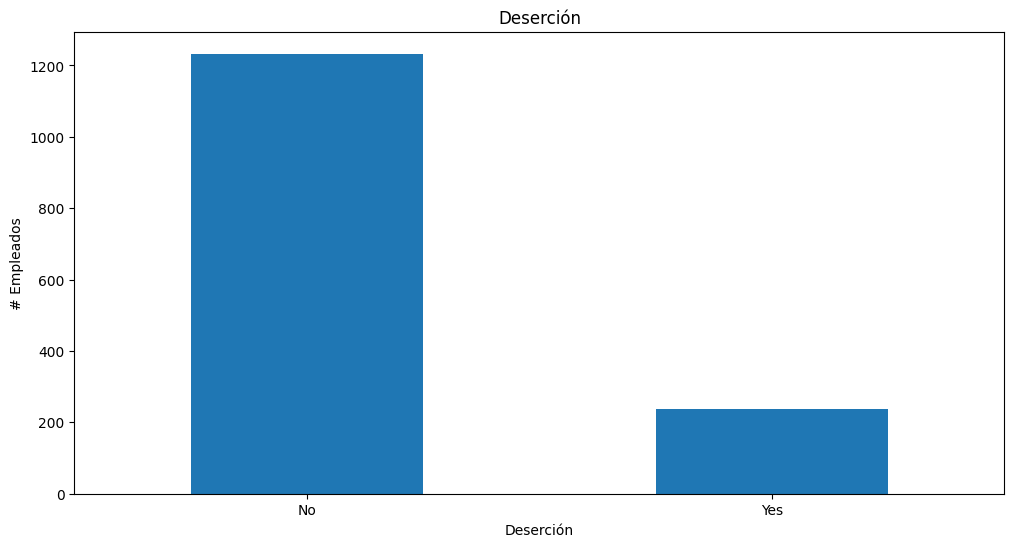

In [ ]:
#Distribución de la deserción

df.Attrition.value_counts().plot(kind="bar")
plt.title("Deserción")
plt.xlabel("Deserción")
plt.xticks(rotation=0)
plt.ylabel("# Empleados")
plt.show()

# Variables numéricas

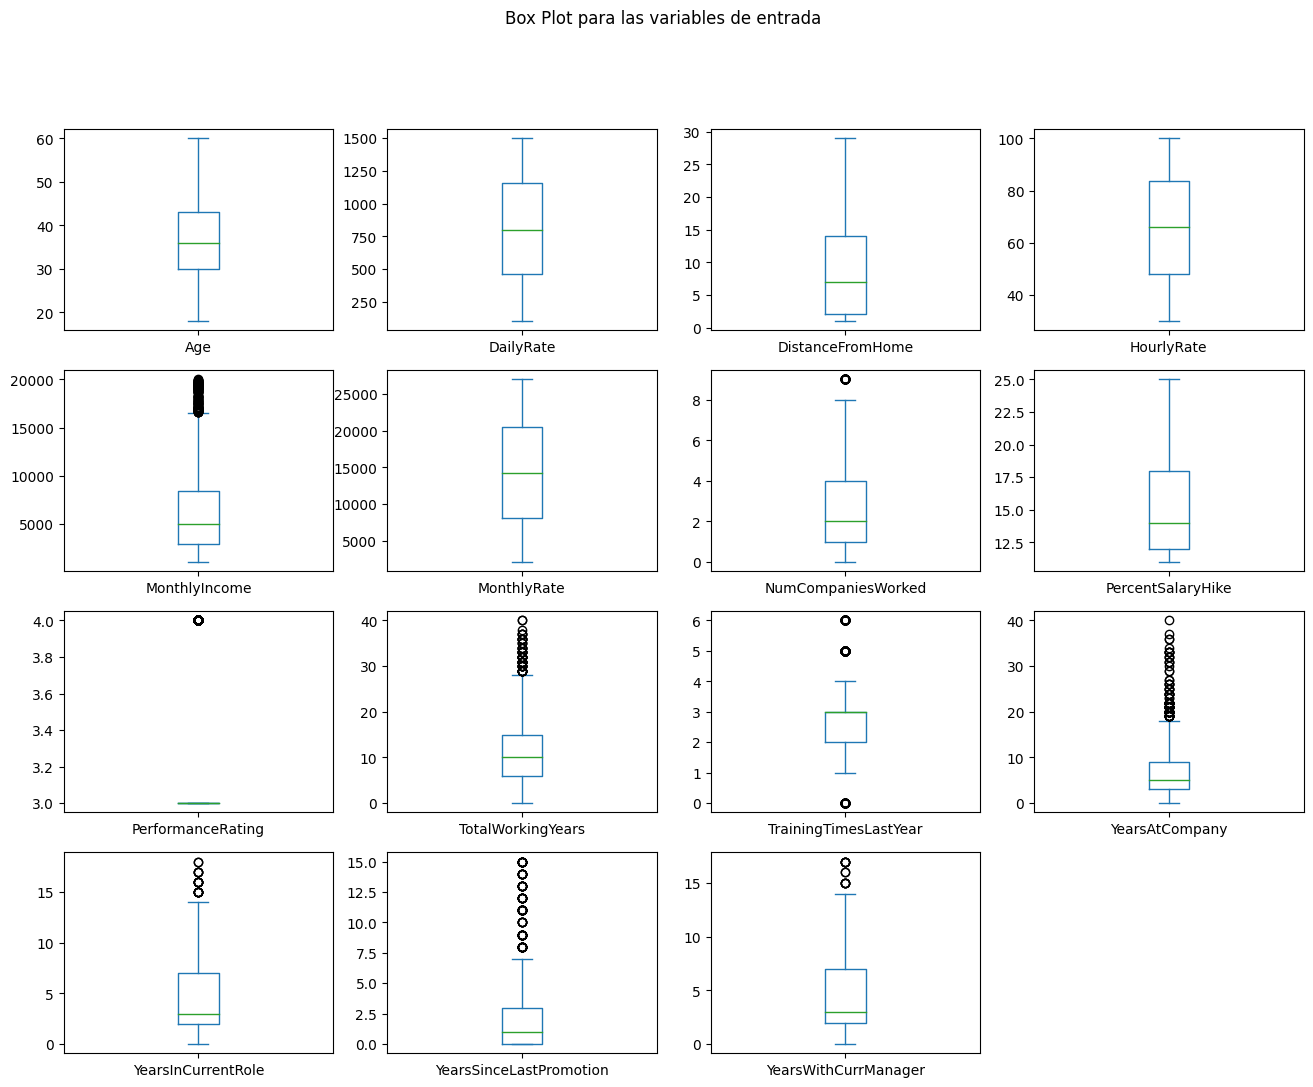

In [ ]:
#Distribución de las variables de entrada

df.drop('Attrition', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16,12), title='Box Plot para las variables de entrada')
#plt.savefig('Attrition')
plt.show()

# Relación de variables numéricas

# Correlación de las variables numéricas

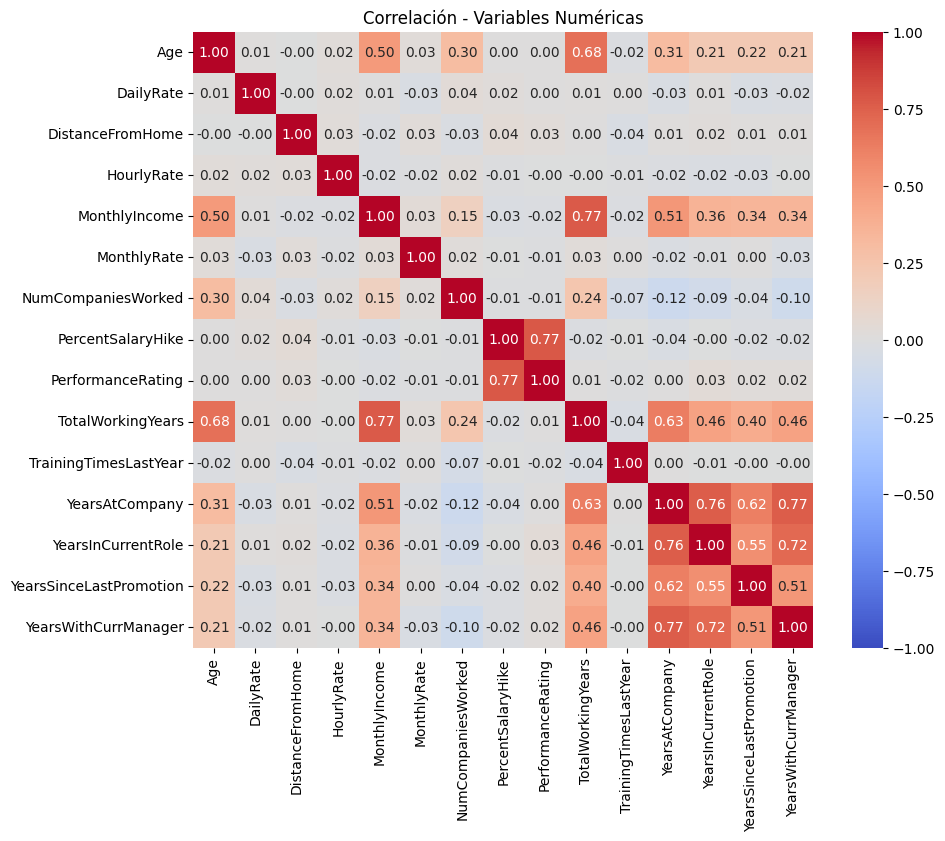

In [ ]:
# Seleccionar sólo las columnas numéricas
numeric_vars = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
corr_numeric = numeric_vars.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_numeric, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación - Variables Numéricas')
plt.show()

Las correlaciones más fuertes entre las variables numéricas son 0.77 y 0.76.

Correlación de 0.77 entre:

*   'YearsAtCompany' - 'YearsWithCurrentManager'
*   'MonthlyIncome' - 'TotalWorkingYears'
*   'PercentSalaryHike - 'PerformanceRating'

Correlación de 0.76 entre 'YearsAtCompany' - 'YearsInCurrentRole'




# Identificar la distribución de los datos para las variables correlacionadas fuertemente

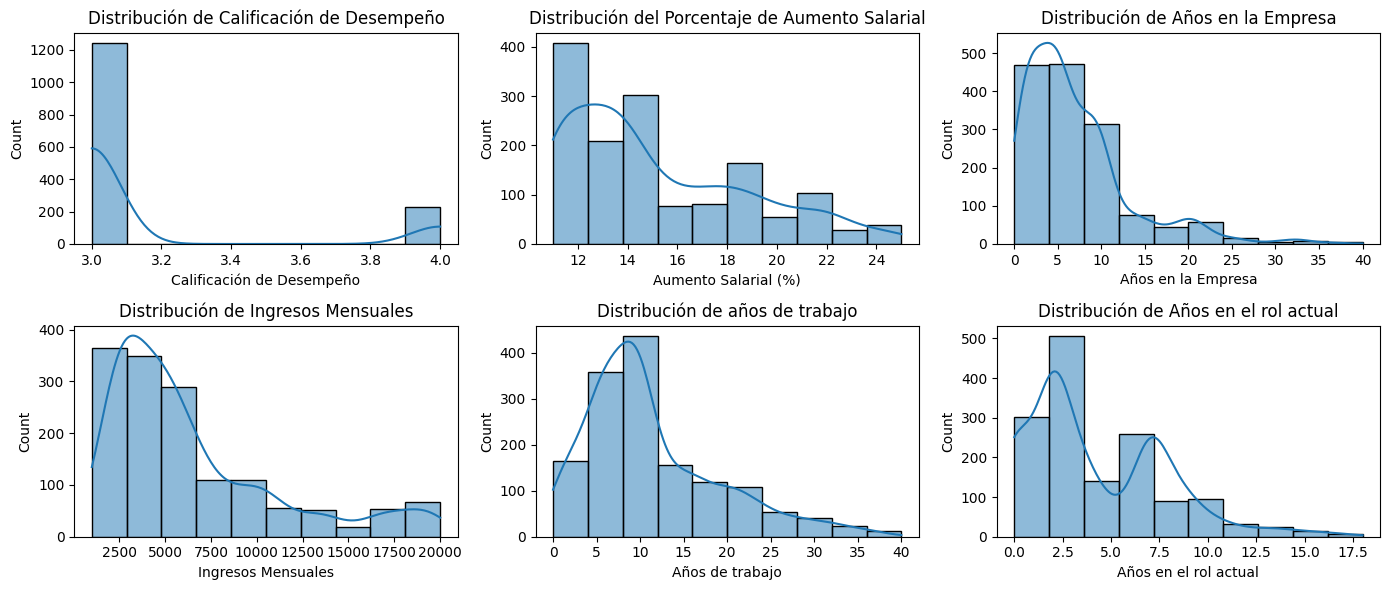

In [ ]:
# Histograma para 'PerformanceRating'
plt.figure(figsize=(14, 6))

plt.subplot(2, 3, 1)
sns.histplot(df['PerformanceRating'], bins=10, kde=True)
plt.title('Distribución de Calificación de Desempeño')
plt.xlabel('Calificación de Desempeño')

# Histograma para 'PercentSalaryHike'
plt.subplot(2, 3, 2)
sns.histplot(df['PercentSalaryHike'], bins=10, kde=True)
plt.title('Distribución del Porcentaje de Aumento Salarial')
plt.xlabel('Aumento Salarial (%)')

# Histograma para 'YearsAtCompany'
plt.subplot(2, 3, 3)
sns.histplot(df['YearsAtCompany'], bins=10, kde=True)
plt.title('Distribución de Años en la Empresa')
plt.xlabel('Años en la Empresa')

# Histograma para 'MonthlyIncome'

plt.subplot(2, 3, 4)
sns.histplot(df['MonthlyIncome'], bins=10, kde=True)
plt.title('Distribución de Ingresos Mensuales')
plt.xlabel('Ingresos Mensuales')

# Histograma para 'TotalWorkingYears'
plt.subplot(2, 3, 5)
sns.histplot(df['TotalWorkingYears'], bins=10, kde=True)
plt.title('Distribución de años de trabajo')
plt.xlabel('Años de trabajo')

# Histograma para 'YearsInCurrentRole'
plt.subplot(2, 3, 6)
sns.histplot(df['YearsInCurrentRole'], bins=10, kde=True)
plt.title('Distribución de Años en el rol actual')
plt.xlabel('Años en el rol actual')


plt.tight_layout()
plt.show()

# Variables categóricas

In [ ]:
# Función para calcular Cramer's V
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    # Crear una tabla de contingencia
    confusion_matrix = pd.crosstab(x, y)

    # Calcular el valor chi-cuadrado de la tabla de contingencia
    chi2 = chi2_contingency(confusion_matrix)[0]

    # Calcular el tamaño de la muestra
    n = confusion_matrix.sum().sum()

    # Obtener la forma de la matriz de confusión
    r, k = confusion_matrix.shape

    # Devolver el valor de Cramer's V
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [ ]:
# Crear una matriz vacía para almacenar los valores de Cramer's V
n = len(categorical_columns)
cramers_v_matrix = np.zeros((n, n))

# Llenar la matriz de correlación
for i in range(n):
    for j in range(i, n):
        cramers_v_matrix[i, j] = cramers_v(df[categorical_columns[i]], df[categorical_columns[j]])
        cramers_v_matrix[j, i] = cramers_v_matrix[i, j]

# Convertir la matriz en un DataFrame para facilitar la visualización
cramers_v_df = pd.DataFrame(cramers_v_matrix, index=categorical_columns, columns=categorical_columns)

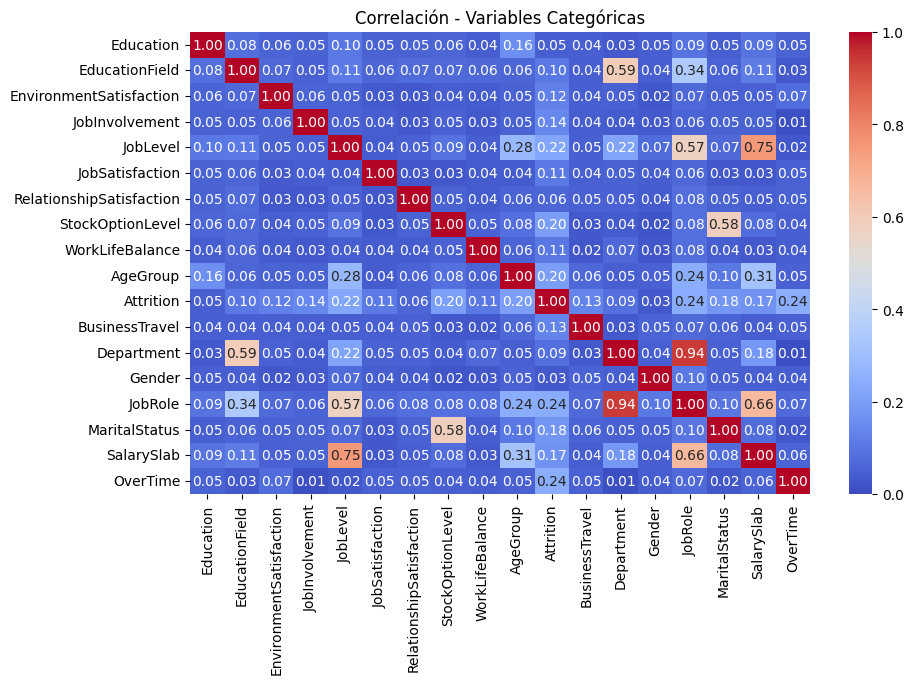

In [ ]:
# Crear un mapa de calor para la matriz de correlación

plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_df, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlación - Variables Categóricas')
plt.show()

Las correlaciones más fuertes en las variables categóricas son
0.94 y 0.75.

*   0.94 : 'JobRole' - 'Department'
*   0.75 : 'SalarySlab' - 'JobLevel'



Distribución de variables categóricas

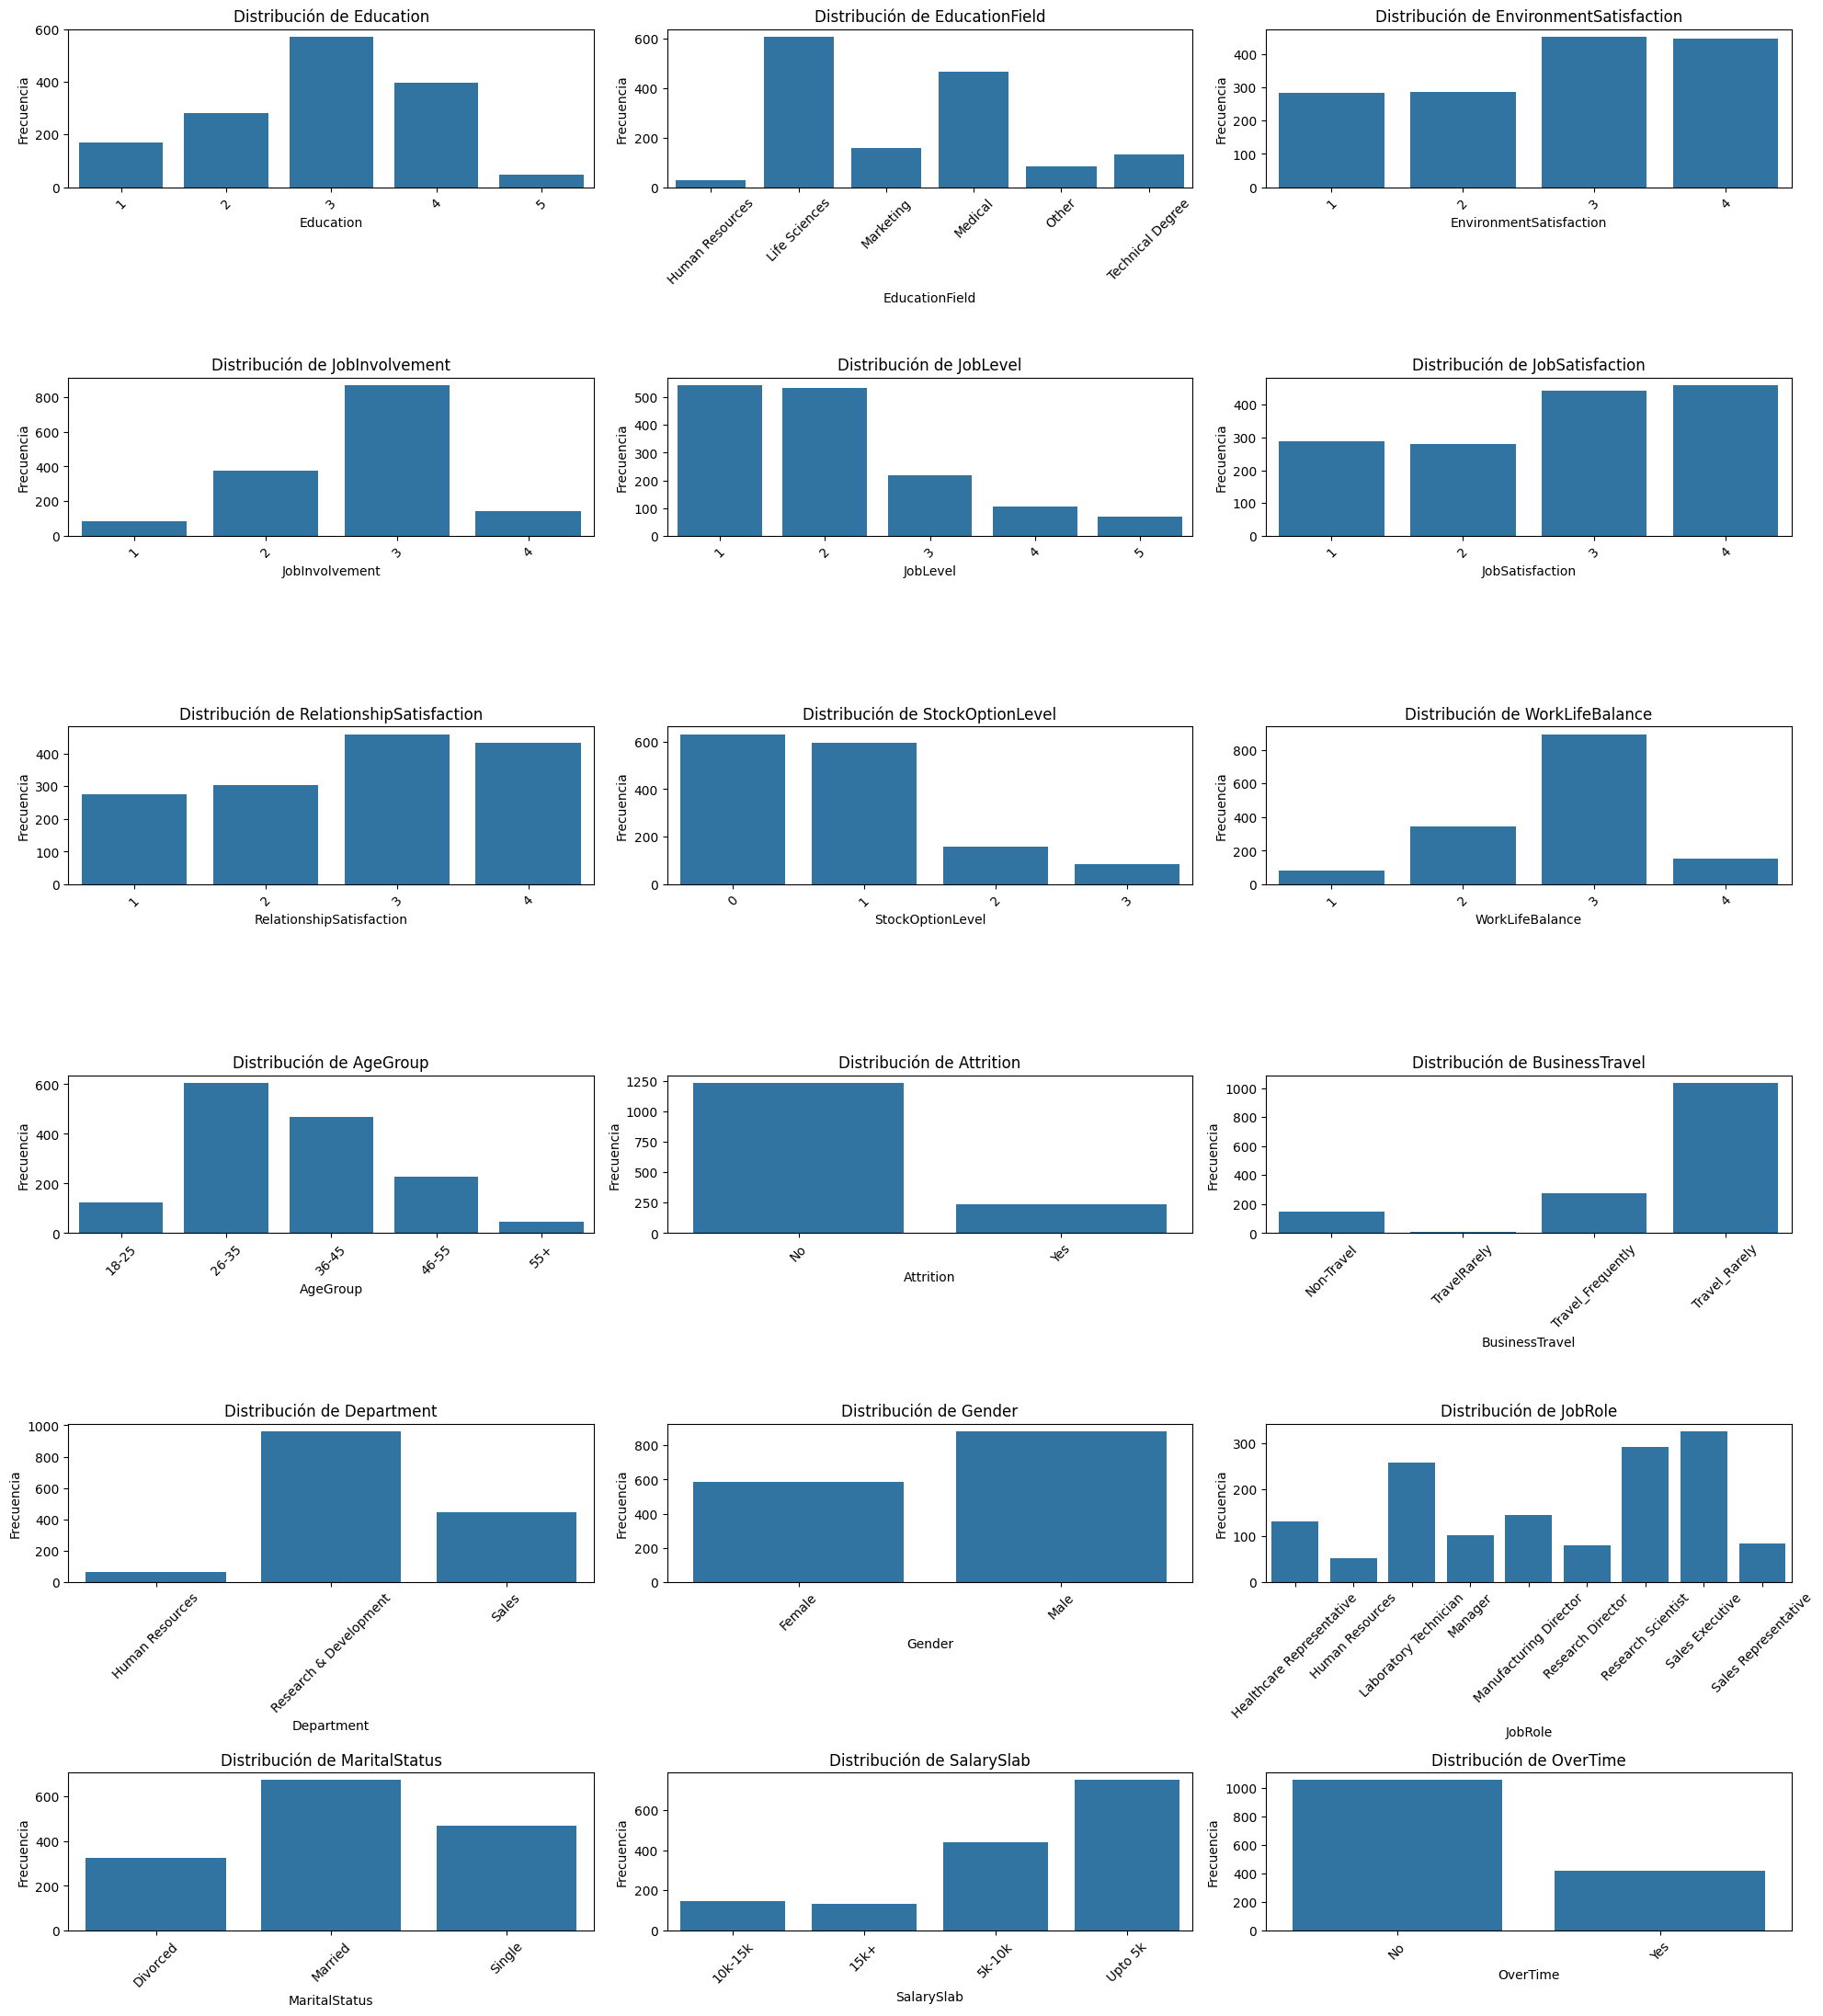

In [ ]:
plt.figure(figsize=(20, 25))

for i, var in enumerate(categorical_columns):
    plt.subplot(7, 3, i+1)
    sns.countplot(x=var, data=df)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Conviene ver la correrlación entre todas las variables de entrada en lugar de verlas por separado (numéricas y categóricas). Es valioso evaluarlas en conjunto, ya que permite tener una visión integral de cómo interactúan entre sí.

# Correlación de todas las variables de entrada

In [ ]:
# Definición de variables categóricas (ordinales y nominales)
nominal_columns = ['EducationField', 'BusinessTravel','Department', 'Gender','JobRole', 'MaritalStatus', 'OverTime']
ordinal_columns = [col for col in categorical_columns if col not in nominal_columns]


In [ ]:
#Aplicar Label Encoding a las variables ordinales

label_encoder = LabelEncoder()
for col in ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Verificar las columnas del dataframe original antes de cualquier operación
print("Columnas del dataframe original:", df.columns)

# Excluir 'Attrition' antes de aplicar one-hot encoding
df_without_attrition = df.drop('Attrition', axis=1)

print("-------------------------------------------------")

# Verificar si 'Attrition' está excluida correctamente
print("'Attrition' ha sido eliminada:", 'Attrition' not in df_without_attrition.columns)

Columnas del dataframe original: Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
-------------------------------------------------
'Attrition' ha sido eliminada: True


In [ ]:
# Aplicar one-hot encoding solo a las variables nominales (excluyendo 'Attrition')
df_encoded = pd.get_dummies(df_without_attrition, columns=nominal_columns, drop_first=True)

# Verificar si las columnas nominales fueron codificadas correctamente
print("Columnas después del encoding:", df_encoded.columns)

# Volver a agregar la columna 'Attrition'
df_encoded['Attrition'] = df['Attrition']

print("-------------------------------------------")

# Verificar si 'Attrition' ha sido agregada de nuevo
print("Columnas finales después de agregar 'Attrition':", df_encoded.columns)

Columnas después del encoding: Index(['EmpID', 'Age', 'AgeGroup', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'BusinessTravel_TravelRarely', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager'

In [ ]:
# Eliminar las columnas no numéricas del análisis de correlaciones
df_encoded = df_encoded.drop('EmpID', axis=1)

# Verificar si las columnas se han eliminado correctamente
print(df_encoded.columns)

Index(['Age', 'AgeGroup', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'BusinessTravel_TravelRarely',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
    

In [ ]:
# Calcular la matriz de correlaciones
correlation_matrix = df_encoded.corr()

In [ ]:
#Desenrollar la matriz de correlaciones y convertirla a una tabla
correlation_table = correlation_matrix.unstack().reset_index()
correlation_table.columns = ['Variable_1', 'Variable_2', 'Correlation']

In [ ]:
# Eliminar correlaciones duplicadas y auto-correlaciones
correlation_table = correlation_table[correlation_table['Variable_1'] != correlation_table['Variable_2']]
correlation_table = correlation_table.drop_duplicates(subset=['Correlation'])

In [ ]:
# Filtrar correlaciones fuertes
strong_correlations = correlation_table[abs(correlation_table['Correlation']) > 0.7]

# Ordenar y mostrar correlaciones fuertes
strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False)
strong_correlations

,Variable_1,Variable_2,Correlation
1,Age,AgeGroup,0.95
394,JobLevel,MonthlyIncome,0.95
1674,Department_Sales,JobRole_Sales Executive,0.81
402,JobLevel,TotalWorkingYears,0.78
687,PercentSalaryHike,PerformanceRating,0.77
498,MonthlyIncome,TotalWorkingYears,0.77
1032,YearsAtCompany,YearsWithCurrManager,0.77
1030,YearsAtCompany,YearsInCurrentRole,0.76
1080,YearsInCurrentRole,YearsWithCurrManager,0.72
1626,Department_Research & Development,JobRole_Sales Executive,-0.73


# Correlaciones Fuertes (Positivas)

* Age y AgeGroup (0.95): Como era de esperarse, la edad y el grupo de edad tienen una correlación muy fuerte, ya que son básicamente representaciones diferentes de la misma información. *No genera valor para el análisis*

* JobLevel y MonthlyIncome (0.95): A medida que aumenta el nivel del puesto, también lo hace el salario mensual, lo que es intuitivo en la mayoría de los entornos laborales. *No genera valor para el análisis*

* Department_Sales y JobRole_Sales Executive (0.81): Esta correlación muestra que quienes tienen el rol de “Sales Executive” pertenecen mayoritariamente al departamento de ventas, como es lógico. *No genera valor para el análisis*

* JobLevel y TotalWorkingYears (0.78): Los empleados que han trabajado más años suelen tener niveles de trabajo más altos.

* PercentSalaryHike y PerformanceRating (0.77): El incremento en salario está correlacionado con el rendimiento, lo que sugiere que un buen desempeño conduce a aumentos salariales.

* YearsAtCompany, YearsWithCurrManager, y YearsInCurrentRole (0.72 - 0.77): Estas variables relacionadas con la antigüedad dentro de la empresa, en el puesto actual y con el gerente actual están lógicamente correlacionadas.

# Correlaciones Fuertes (Negativas)

* Department_Research & Development y JobRole_Sales Executive (-0.73): Es una relación negativa esperada, ya que los ejecutivos de ventas no pertenecen al departamento de investigación y desarrollo. *No genera valor para el análisis*

* BusinessTravel_Travel_Frequently y BusinessTravel_Travel_Rarely (-0.74): Las personas que viajan con frecuencia tienden a no viajar rara vez, lo que es lógico por la naturaleza dicotómica de estas categorías. *No genera valor para el análisis*

* JobLevel y SalarySlab (-0.80) / MonthlyIncome y SalarySlab (-0.83): Esta relación negativa indica que los niveles de salario más bajos (categoría de banda salarial) están asociados con mayores niveles de ingresos mensuales o niveles de puesto.



Visualización de cada variable de correlación fuerte con la variable objetivo 'Attrition'

In [ ]:
# Filtrar las columnas relevantes y la columna 'Attrition'
columns_of_interest = ['Age', 'AgeGroup','JobLevel', 'TotalWorkingYears', 'PercentSalaryHike', 'PerformanceRating', 'SalarySlab', 'MonthlyIncome', 'BusinessTravel_Travel_Frequently',
                       'BusinessTravel_Travel_Rarely', 'Attrition','YearsAtCompany', 'YearsInCurrentRole']

# Crear un nuevo dataframe con las columnas de interés
df_filtered = df_encoded[columns_of_interest]

# Calcular la correlación de estas variables con 'Attrition'
correlation_with_attrition = df_filtered.corr()['Attrition'].sort_values(ascending=False)

# Mostrar las correlaciones
print(correlation_with_attrition)

Attrition                           1.00
SalarySlab                          0.13
BusinessTravel_Travel_Frequently    0.12
PerformanceRating                   0.00
PercentSalaryHike                  -0.01
BusinessTravel_Travel_Rarely       -0.04
YearsAtCompany                     -0.13
AgeGroup                           -0.15
Age                                -0.16
MonthlyIncome                      -0.16
YearsInCurrentRole                 -0.16
JobLevel                           -0.17
TotalWorkingYears                  -0.17
Name: Attrition, dtype: float64


# **Interpretación de las Correlaciones:**

# Correlaciones Positivas:

* SalarySlab (0.13): Una correlación positiva débil sugiere que un aumento en la banda salarial puede estar ligeramente asociado con una mayor probabilidad de salida. Sin embargo, la correlación es baja, indicando una relación débil.

* BusinessTravel_Travel_Frequently (0.12): También una correlación positiva débil, indicando que los empleados que viajan frecuentemente podrían tener una ligera mayor probabilidad de salir, aunque no es una correlación fuerte.

# Correlaciones Negativas:

*PerformanceRating (0.00): No hay correlación con la salida de empleados, lo que sugiere que el desempeño no está relacionado con la probabilidad de que un empleado deje la empresa.

* PercentSalaryHike (-0.01): Una correlación negativa muy débil que indica que los aumentos salariales tienen casi ninguna relación con la salida de empleados.

* BusinessTravel_Travel_Rarely (-0.04): Similar a la categoría de viaje frecuente, pero con una correlación aún más débil.

* YearsAtCompany (-0.13): Los empleados con más años en la empresa tienen una ligera menor probabilidad de salida.

* AgeGroup (-0.15), Age (-0.16), MonthlyIncome (-0.16), YearsInCurrentRole (-0.16), JobLevel (-0.17) y TotalWorkingYears (-0.17): Todas muestran una correlación negativa débil con la salida de empleados, lo que sugiere que a medida que aumentan estos valores, la probabilidad de que un empleado deje la empresa disminuye ligeramente.

In [ ]:
# Visualizar cómo se comportan dos variables al mismo tiempo, agrupadas por 'Attrition'

# Lista de pares de variables a graficar
variable_pairs = [
    ('JobLevel', 'MonthlyIncome'),
    ('JobLevel', 'TotalWorkingYears'),
    ('YearsAtCompany', 'YearsWithCurrManager'),
    ('PercentSalaryHike', 'PerformanceRating'),
    ('JobLevel', 'SalarySlab'),
    ('Age', 'MonthlyIncome')
]

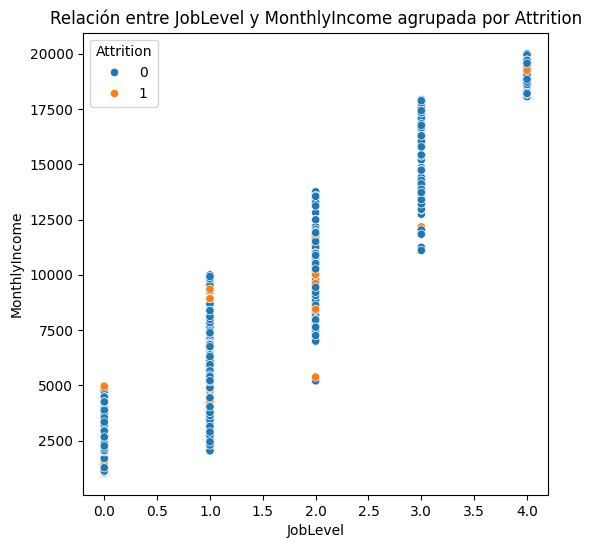

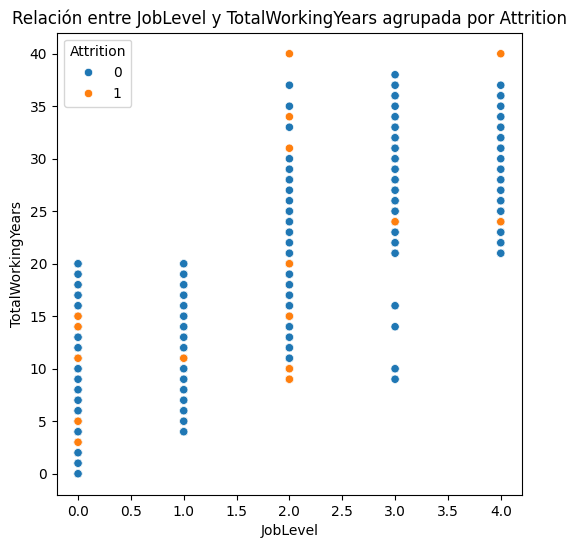

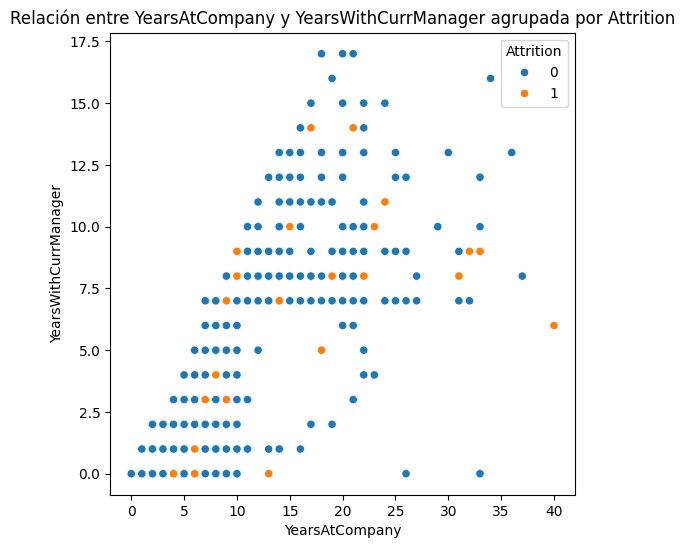

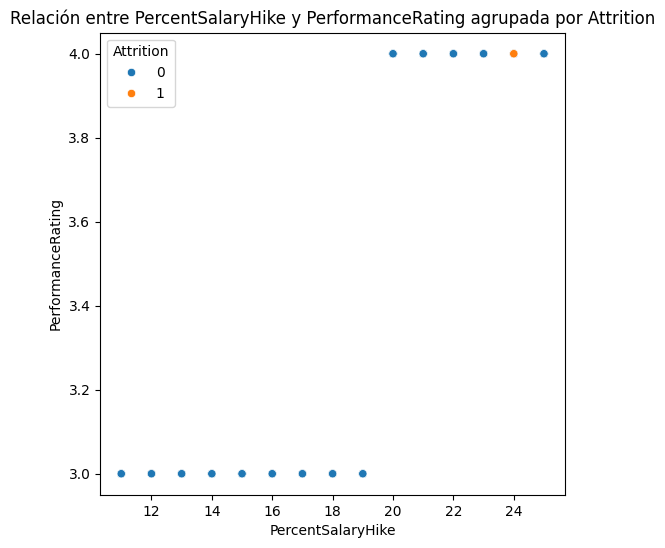

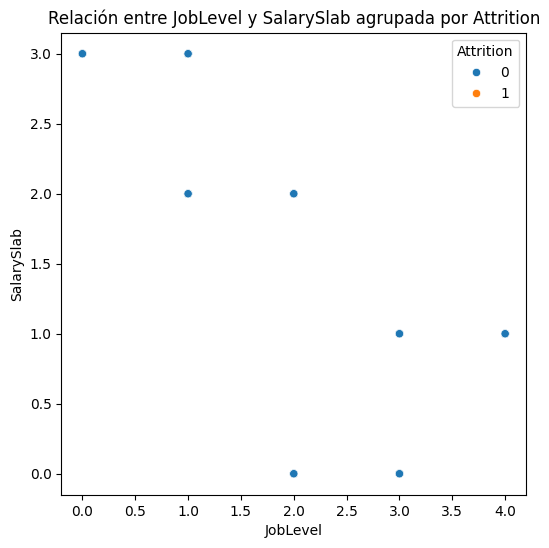

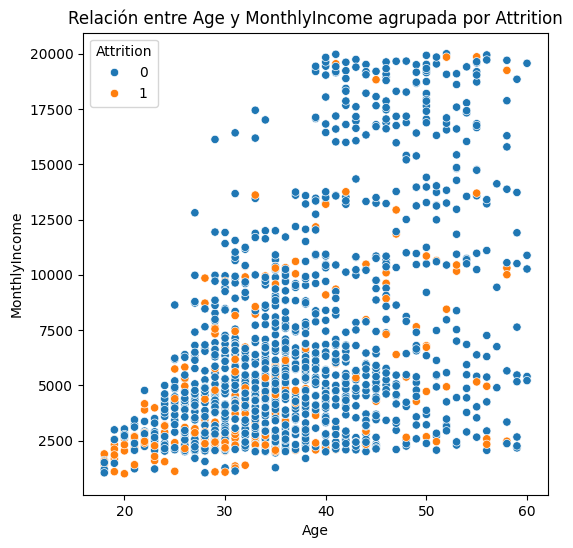

In [ ]:
# Crear un gráfico de dispersión para cada par de variables agrupado por 'Attrition'
for var1, var2 in variable_pairs:
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=df_encoded, x=var1, y=var2, hue='Attrition')
    plt.title(f"Relación entre {var1} y {var2} agrupada por Attrition")
    plt.show()

No se evidencia relación de estos pares de variables con la salida de empleados.

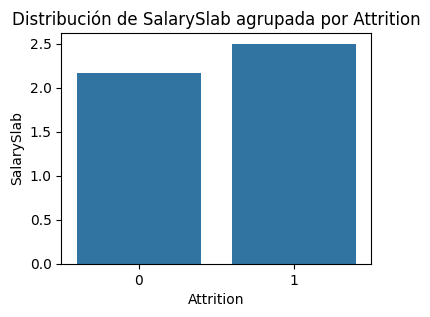

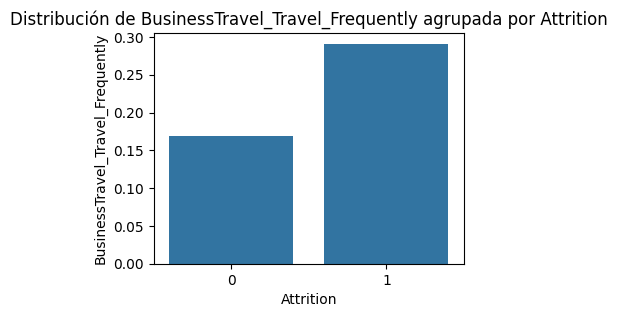

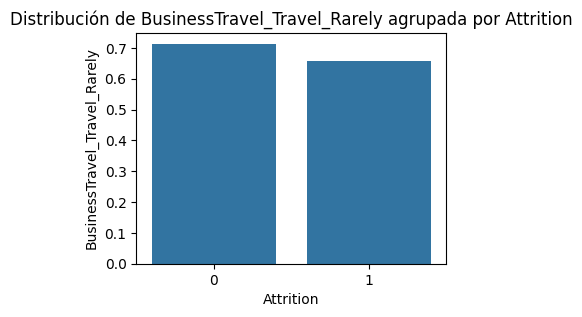

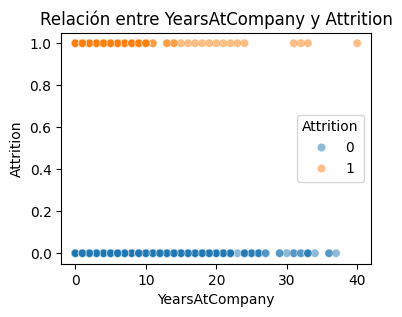

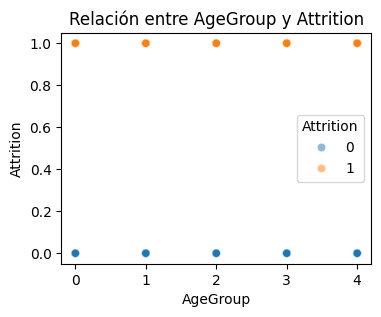

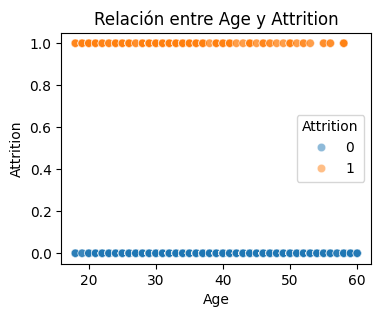

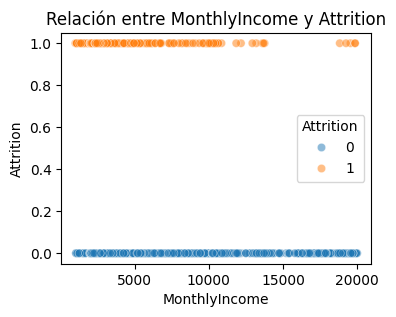

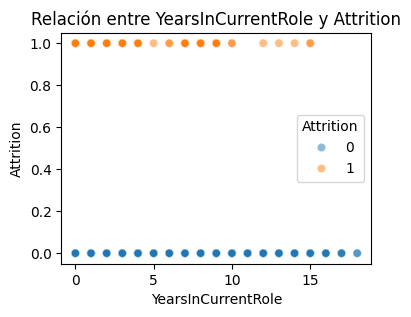

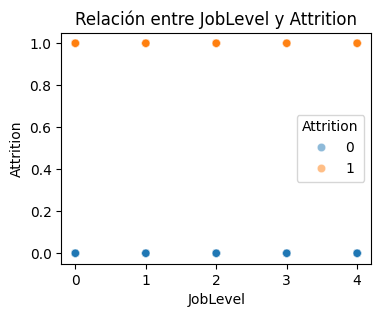

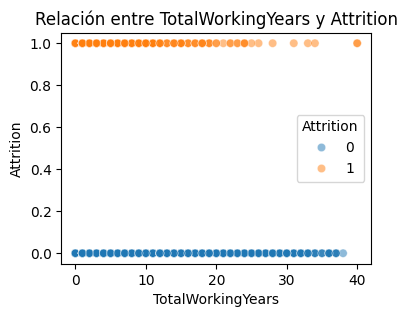

In [ ]:
# Variables categóricas para visualizar
categorical_vars = ['SalarySlab', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']
numerical_vars = ['YearsAtCompany', 'AgeGroup', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']

# Crear gráficos para variables categóricas
for var in categorical_vars:
    plt.figure(figsize=(4,3))
    sns.barplot(data=df_encoded, x='Attrition', y=var, ci=None)
    plt.title(f"Distribución de {var} agrupada por Attrition")
    plt.show()

# Crear gráficos para variables numéricas
for var in numerical_vars:
    plt.figure(figsize=(4,3))
    sns.scatterplot(data=df_encoded, x=var, y='Attrition', hue='Attrition', alpha=0.5)
    plt.title(f"Relación entre {var} y Attrition")
    plt.show()

Nuevamente no se evidencia relación de estos pares de variables con la salida de empleados.

A continuación, exploraciones adicionales para tratar de encontrar mejore relaciones con 'Attrition'.

In [ ]:
# Estadísticas descriptivas agrupadas por 'Attrition'
df_encoded.groupby('Attrition').describe()

Age                                          AgeGroup       \
             count  mean  std   min   25%   50%   75%   max    count mean   
Attrition                                                                   
0         1,233.00 37.56 8.89 18.00 31.00 36.00 43.00 60.00 1,233.00 1.70   
1           237.00 33.61 9.69 18.00 28.00 32.00 39.00 58.00   237.00 1.32   

           ... YearsSinceLastPromotion       YearsWithCurrManager            \
           ...                     75%   max                count mean  std   
Attrition  ...                                                                
0          ...                    3.00 15.00             1,184.00 4.37 3.59   
1          ...                    2.00 15.00               229.00 2.81 3.13   

                                     
           min  25%  50%  75%   max  
Attrition                            
0         0.00 2.00 3.00 7.00 17.00  
1         0.00 0.00 2.00 5.00 14.00  

[2 rows x 200 columns]

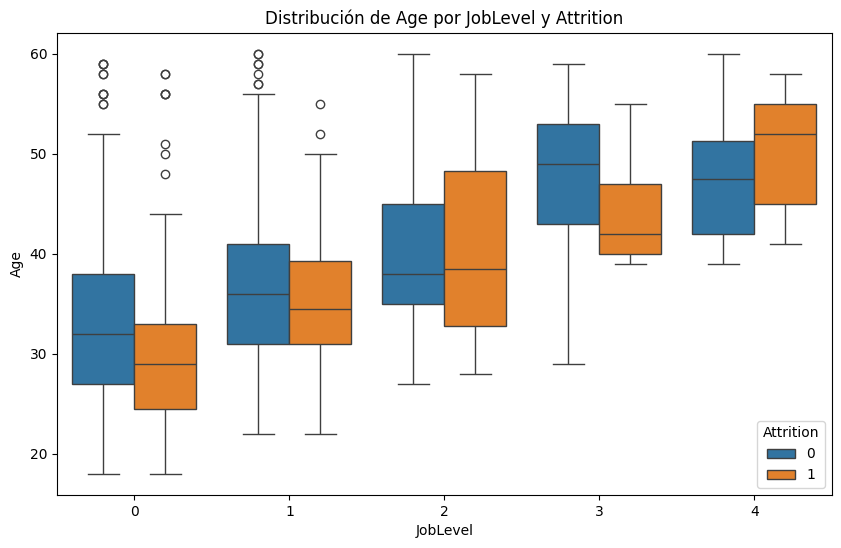

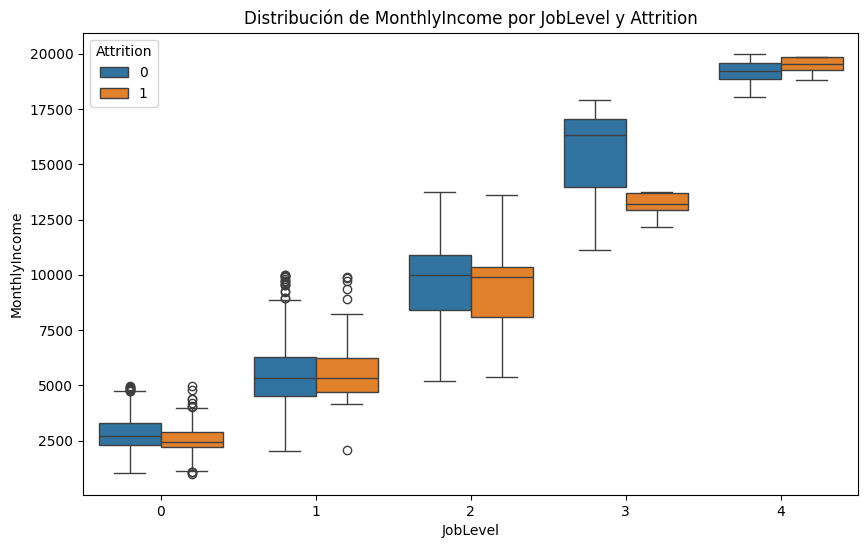

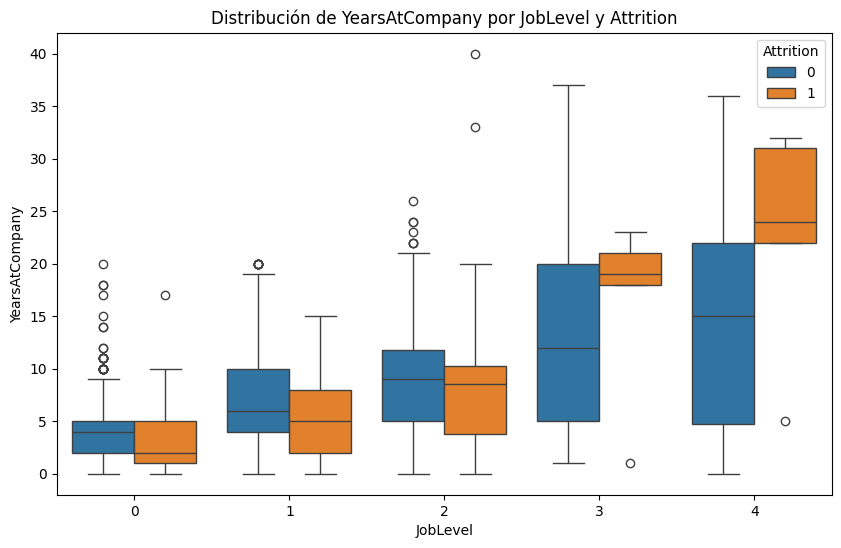

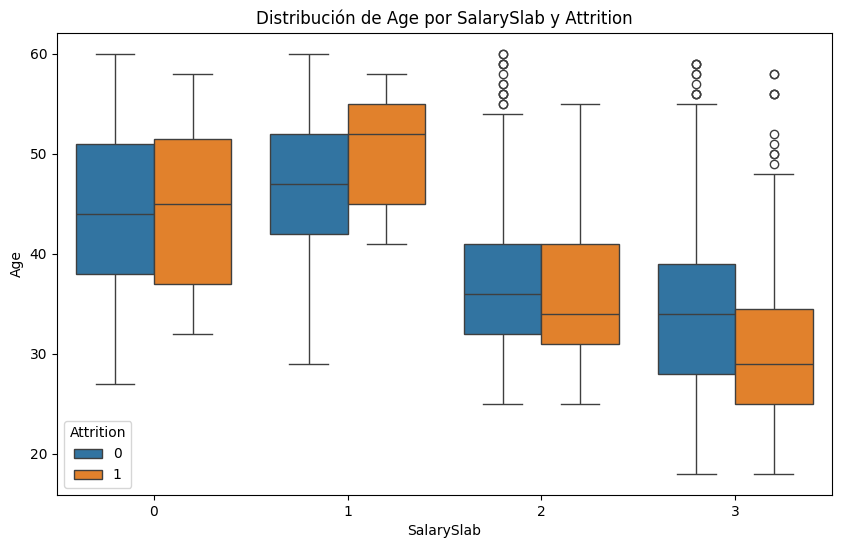

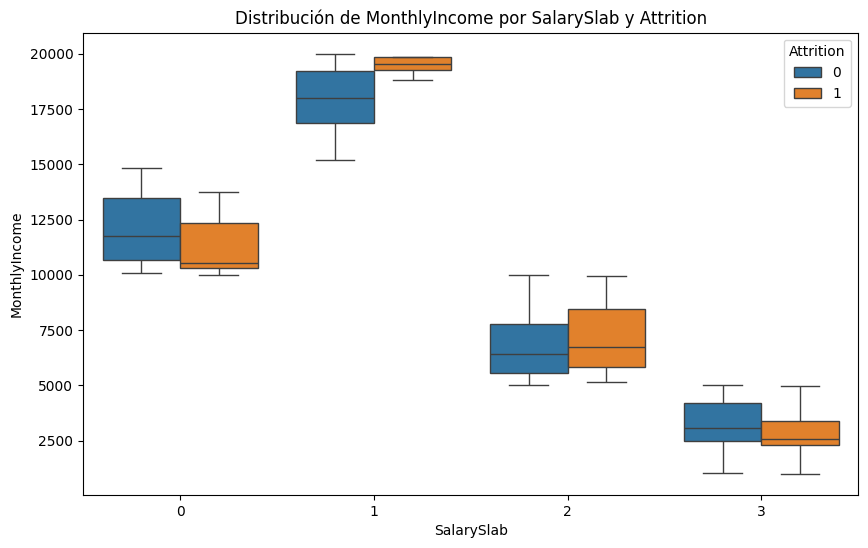

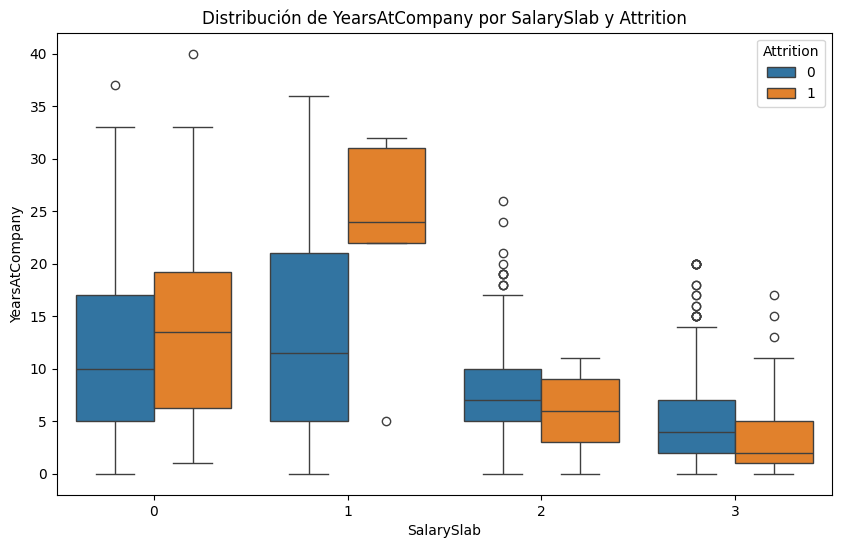

In [ ]:
# Segmentar por 'JobLevel' y ver la media de otras variables
for var in ['Age', 'MonthlyIncome', 'YearsAtCompany']:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_encoded, x='JobLevel', y=var, hue='Attrition')
    plt.title(f"Distribución de {var} por JobLevel y Attrition")
    plt.show()

# Segmentar por 'SalarySlab'
for var in ['Age', 'MonthlyIncome', 'YearsAtCompany']:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_encoded, x='SalarySlab', y=var, hue='Attrition')
    plt.title(f"Distribución de {var} por SalarySlab y Attrition")
    plt.show()

De acuerdo a esta última gráfica, hay una relación interesante entre el SalarySlab 1, empleados con entre 5 y 20 años de servicio y la permanencia de estos. De manera similar sucede con JobLevel 3, MonthlyIncome entre 14.000 y 17.000.

Dado que muchas de las correlaciones son débiles, es importante considerar otras técnicas para el análisis. La correlación sola puede no ser suficiente. El paso siguiente será utilizar modelos de clasificación

In [ ]:
df_encoded.dtypes

,0
Age,int64
AgeGroup,int64
DailyRate,int64
DistanceFromHome,int64
Education,int64
EnvironmentSatisfaction,int64
HourlyRate,int64
JobInvolvement,int64
JobLevel,int64
JobSatisfaction,int64


In [ ]:
# Separación de variables de entrada y Objetivo

X = df_encoded.drop(['YearsWithCurrManager','Attrition'], axis=1)
y = df_encoded['Attrition']

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       241
           1       0.89      0.15      0.26        53

    accuracy                           0.84       294
   macro avg       0.87      0.57      0.59       294
weighted avg       0.85      0.84      0.79       294




El modelo tiene una buena precisión en la clase mayoritaria (0), pero tiene un rendimiento deficiente en la clase minoritaria (1), en otras palabras, el modelo es muy bueno prediciendo la categoría "0" (quienes no dejan la empresa), pero no es tan bueno prediciendo la categoría "1" (quienes sí dejan la empresa).

# Conclusiones

**1. Análisis Exploratorio de Datos:**

* **Variables Numéricas:** Se identificaron correlaciones notables entre variables numéricas como 'YearsAtCompany' y 'YearsWithCurrManager' (0.77), así como entre 'MonthlyIncome' y 'TotalWorkingYears' (0.77). Estas correlaciones indican que empleados con más años en la empresa y en su puesto actual tienden a tener ingresos más altos y un mejor desempeño.

* **Variables Categóricas:** Las correlaciones más fuertes en variables categóricas fueron entre 'JobRole' y 'Department' (0.94), y entre 'SalarySlab' y 'JobLevel' (-0.80), lo que refleja una relación esperada entre el rol de trabajo y el departamento, así como entre la banda salarial y el nivel de trabajo.

**2. Relación con la Variable Objetivo 'Attrition':**

* **Correlaciones:** Se observó que las correlaciones entre 'Attrition' y variables como 'AgeGroup', 'MonthlyIncome' y 'YearsAtCompany' fueron negativas, aunque en su mayoría débiles. Esto sugiere que factores como la edad y la antigüedad en la empresa tienen una relación limitada con la salida de empleados.

* **Visualización:** Las visualizaciones de la relación entre estas variables y la salida de empleados mostraron que las bandas salariales más bajas y el mayor número de años en la empresa están ligeramente asociados con una menor probabilidad de salida, pero la relación no es fuerte.

**3. Modelado Predictivo:**

* **Modelo de Clasificación (Árbol de Decisión):** La precisión del modelo para predecir quién no dejará la empresa fue alta (84%), aunque la capacidad para identificar correctamente a los empleados que sí se irán fue menor (15%). Esto indica que, aunque el modelo es eficaz para identificar a los empleados que probablemente se quedarán, la capacidad para predecir a quienes dejarán la empresa aún puede mejorarse.

* **Utilidad del Modelo:** La capacidad del modelo para predecir con precisión a los empleados que no se irán es valiosa, dado que la retención de empleados es una prioridad para la empresa. El modelo puede ser utilizado para enfocar estrategias de retención en los empleados con mayor probabilidad de quedarse, optimizando los recursos y esfuerzos en áreas críticas.

# Recomendaciones:

* Mejorar la capacidad del modelo incorporando variables adicionales para identificar a los empleados que se irán .

* Utilizar el modelo para identificar a los empleados con alta probabilidad de permanecer puede ayudar a enfocar las estrategias de permanencia, reforzando las políticas de apoyo y desarrollo para estos empleados clave.